In [223]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import wget


In [224]:
a=wget.download( "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv")

100% [..............................................................................] 72629 / 72629

In [225]:
Fuel=pd.read_csv(a)
Fuel

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [230]:
df=Fuel[["CYLINDERS","CO2EMISSIONS"]]
df

,CYLINDERS,CO2EMISSIONS
0,4,196
1,4,221
2,4,136
3,6,255
4,6,244
...,...,...
1062,6,271
1063,6,264
1064,6,271
1065,6,260


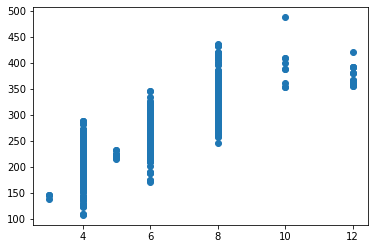

In [231]:
plt.scatter(df.CYLINDERS,df.CO2EMISSIONS)
plt.show()

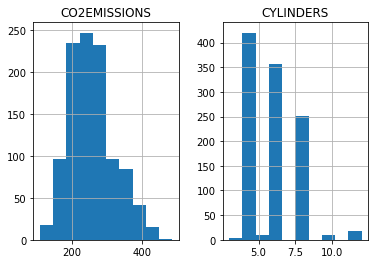

In [232]:
df.hist()
plt.show()

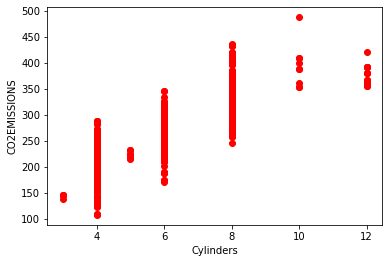

In [233]:
plt.scatter(df.CYLINDERS,df.CO2EMISSIONS,color='r')

plt.xlabel("Cylinders")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [234]:
mask=np.random.rand(len(df))<0.75
train=df[mask]
test=df[~mask]

In [255]:
import sklearn
from sklearn import linear_model
regr=linear_model.LinearRegression()
X1=np.asanyarray(train[["CYLINDERS"]])
Y1=np.asanyarray(train[["CO2EMISSIONS"]])
regr.fit (X,Y)
print("slope : %.2f"   %regr.coef_)
print("intercept: %.2f" %regr.intercept_)

slope : 29.96
intercept: 82.63


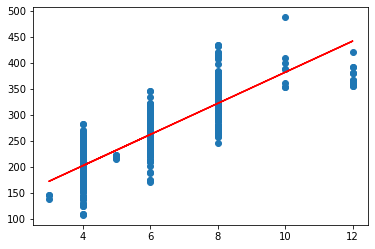

In [256]:
plt.scatter(X1,Y1)
plt.plot(X1,(regr.coef_*X1)+regr.intercept_,color="r")
plt.show()

## Model Evaluation


In [257]:
Y_hat1=reg.predict(X1)
print("MAE= %.2f"%np.mean(abs(Y_hat1-Y1)))
print("MSE= %.2f" %np.mean((Y_hat1-Y1)*(Y_hat1-Y1)))

print("R^2 =%.2f" %r2_score(Y1,Y_hat1))

MAE= 25.75
MSE= 1109.95
R^2 =0.72


### Training with full data set 

In [240]:
X=df[["CYLINDERS"]]
Y=df[["CO2EMISSIONS"]]

In [245]:
from sklearn import linear_model
reg=linear_model.LinearRegression()
reg.fit(X,Y)
theta0=reg.intercept_
theta1=reg.coef_
print("theta0= %.2f" %theta0)
print("theta1= %.2f" %theta1)

theta0= 82.63
theta1= 29.96


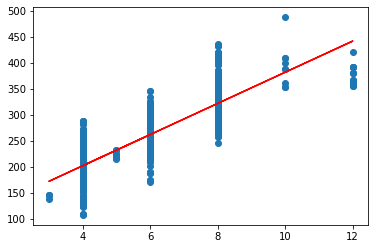

In [244]:
plt.scatter(X,Y)
plt.plot(X,(theta0+(theta1*X)),color="r")
plt.show()

# Model evaluation 

In [246]:
Y_hat=reg.predict(X)


In [253]:
print("MAE= %.2f"%np.mean(abs(Y_hat-Y)))
print("MSE= %.2f" %np.mean((Y_hat-Y)*(Y_hat-Y)))

print("R^2 =%.2f" %r2_score(Y,Y_hat))

MAE= 25.72
MSE= 1115.56
R^2 =0.72
